In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [2]:
import logging

from keras.models import Model
from keras.layers import Input, Flatten, Dense, Activation
from keras.optimizers import Adam

from rl.agents.dqn import DQNAgent
from rl.policy import BoltzmannQPolicy
from rl.memory import SequentialMemory

from env.cant_stop_multiplayer import CantStopMultiplayer

from agents.interleaved import InterleavedAgent

Using TensorFlow backend.


In [3]:
logging.getLogger().setLevel(logging.INFO)
logging.info('test')

INFO:root:test


In [4]:
n_players = 4

In [5]:
env = CantStopMultiplayer(n_players)

nb_actions = env.action_space.n
nb_obs = env.observation_space.n

input_layer = Input(shape=(1, nb_obs,))
x = Flatten()(input_layer)
x = Dense(50, activation='relu')(x)
output_layer = Dense(nb_actions, activation='linear')(x)

model = Model(input_layer, output_layer)

INFO:Can't Stop:Environment for 4 players initiated with rewards {'0_stopping': <function CantStopMultiplayer.__init__.<locals>.<lambda> at 0x7f1fb960a268>, '0_complete_col': 10, '0_complete_game': 100, '0_cont_feas': 0, '0_cont_no_feas': 0, '1_choose_roll': 0, 'wrong_phase': -1}


In [137]:
memory = SequentialMemory(limit=1000000, window_length=1)

policy = BoltzmannQPolicy()


dqn = DQNAgent(model=model, nb_actions=nb_actions, policy=policy, memory=memory,
               nb_steps_warmup=5000, gamma=.99, target_model_update=5000)

In [138]:
agent = InterleavedAgent([dqn] * n_players)

agent.compile([Adam(lr=1e-3)] * n_players, metrics=[])

In [139]:
# agent.load_weights('weights/cant_stop_multiplayer_{}.h5f'.format(n_players))

In [158]:
agent.fit(env, nb_steps=100000, visualize=False, verbose=1)

Training for 100000 steps ...
Interval 1 (0 steps performed)
10000/10000 [==============================] - 24s 2ms/step - reward: 0.8495
65 episodes - episode_reward: 130.603 [0.600, 231.100] - loss: 4.687 - mean_q: 9.941

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 44s 4ms/step - reward: 0.9036
59 episodes - episode_reward: 153.129 [-1.000, 248.900] - loss: 5.023 - mean_q: 10.904

Interval 3 (20000 steps performed)
10000/10000 [==============================] - 32s 3ms/step - reward: 0.8358
58 episodes - episode_reward: 144.128 [24.700, 236.400] - loss: 6.038 - mean_q: 12.344

Interval 4 (30000 steps performed)
10000/10000 [==============================] - 33s 3ms/step - reward: 0.9400
60 episodes - episode_reward: 156.357 [18.700, 233.100] - loss: 5.928 - mean_q: 13.986

Interval 5 (40000 steps performed)
10000/10000 [==============================] - 33s 3ms/step - reward: 0.9738
57 episodes - episode_reward: 170.065 [20.100, 232.800] - loss: 

In [141]:
agent.save_weights('weights/cant_stop_multiplayer_{}.h5f'.format(n_players), overwrite=True)

In [151]:
# standardize all agents to use first agent's weights
# for a in agent.agents:
#     a.load_weights("weights/cant_stop_multiplayer_40.h5f")

Testing for 1 episodes ...


<IPython.core.display.Javascript object>


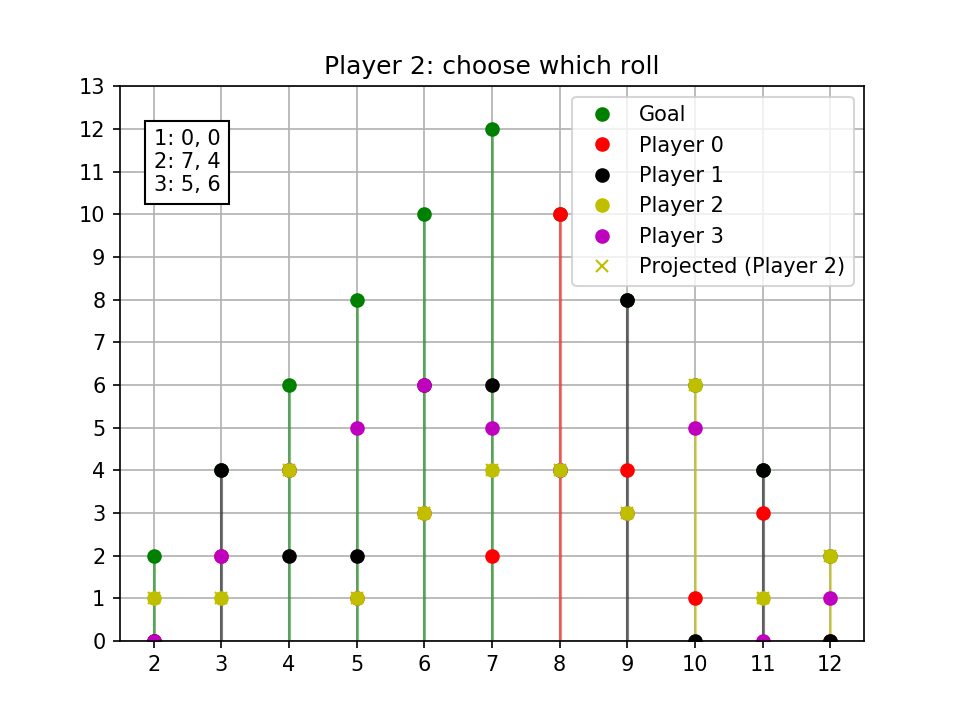

Episode 1: reward: 202.800, steps: 148


In [157]:
cb = agent.test(env, nb_episodes=1, visualize=True)